In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = h5py.File("gamma_test.hdf5", "r")

In [3]:
for items in f.attrs.items():
    print(items)

('particleType', 0)
('converter_version', '1.1')
('HDF5_version', '1.8.15')
('h5py_version', '2.5.0')


# File structure

In [32]:
for groups in f:
    print(groups)

Cameras
eventSimu
showerSimu
simtel_files
telescopeInfos


![](hdf5_structure.png)

# Calibrated images

In [33]:
LSTCam_images = f['Cameras/LSTCAM/images']
LSTCam_pixels_pos = f['Cameras/LSTCAM/pixelsPosition']
LSTCam_eventId = f['Cameras/LSTCAM/eventId']
X = LSTCam_pixels_pos[:,0]
Y = LSTCam_pixels_pos[:,1]

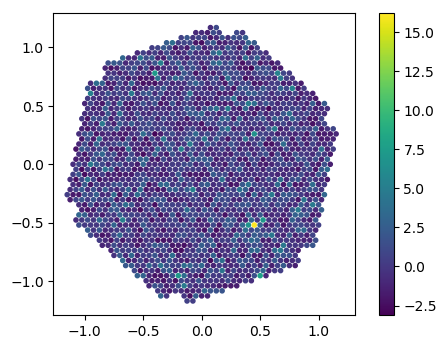

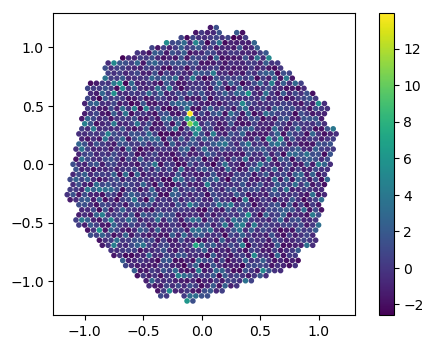

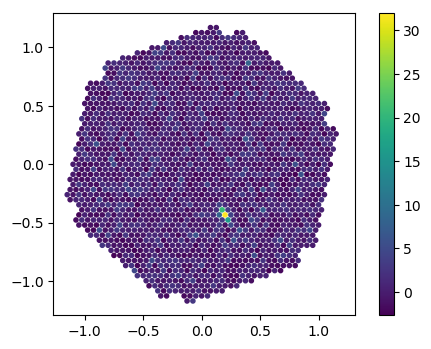

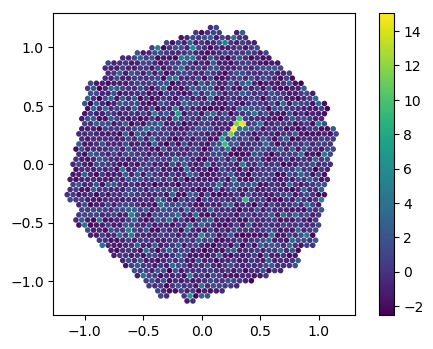

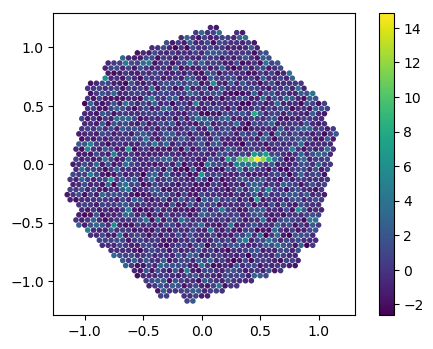

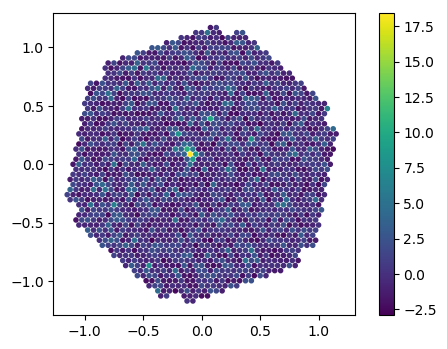

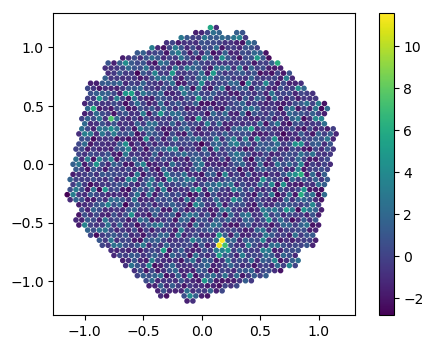

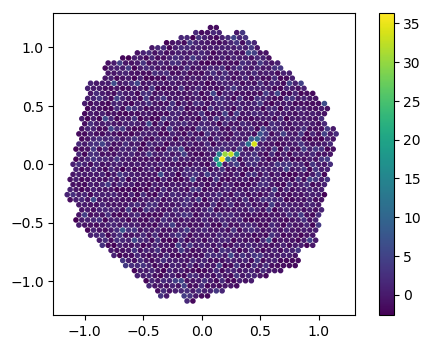

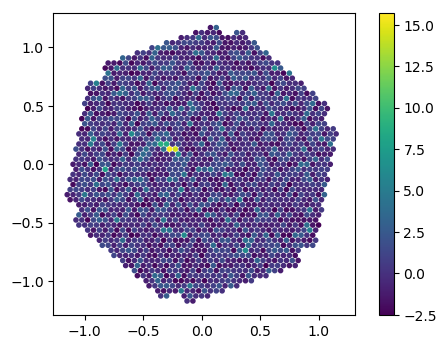

In [34]:
for i in LSTCam_images:
    plt.scatter(X, Y, c=i,s=9)
    plt.axis('square')
    plt.colorbar()
    plt.show()

# Use injunction table to get a square matrix

In [29]:
def camera_to_matrix(image, injTable,nRow,nCol):
    mat = np.zeros((nRow,nCol))
    for i in range(len(X)):
        index = int(injTable[i])
        indexRow = int(index/nCol)
        indexCol = index - int(indexRow*nCol)
        mat[indexRow][indexCol] = image[i]
    return mat

In [30]:
injTable = np.array(f['/Cameras/LSTCAM/injTable'])
nbRow = f['/Cameras/LSTCAM'].attrs['nbRow']
nbCol = f['/Cameras/LSTCAM'].attrs['nbCol']
mat = camera_to_matrix(LSTCam_images[-2], injTable, nbRow, nbCol)

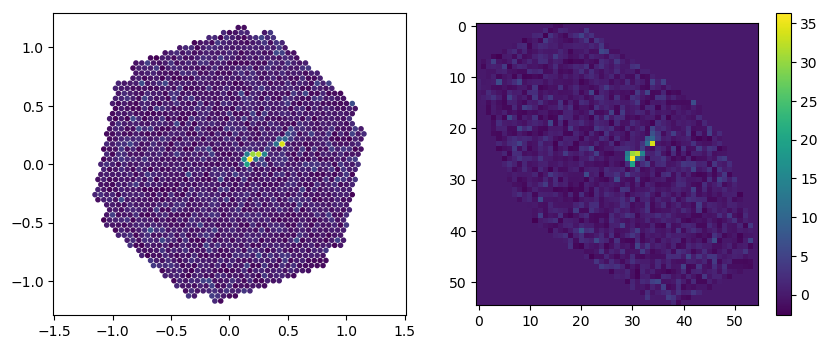

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].scatter(X, Y, c=LSTCam_images[-2],s=9)
axs[0].axis('equal')
cf = axs[1].imshow(mat)
fig.colorbar(cf, ax=axs[1])